**Libraries to be installed**

In [11]:
%pip install pandas 

  Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl (11.6 MB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\91979\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


**Load the Dataset**

In [12]:
import pandas as pd

# Load the dataset
file_path = "Structured/heart.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Inspect the dataset

print(df.head())
print(df.info())
print(df.describe())



   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

**Handle Missing Values**

In [13]:

# Replace missing values for numerical columns
df['trestbps'].fillna(df['trestbps'].mean(), inplace=True)  # Resting blood pressure
df['chol'].fillna(df['chol'].median(), inplace=True)        # Serum cholesterol

# Replace missing values for categorical column
df['thal'].fillna("Unknown", inplace=True)  # Categorical data handling for 'thal'

# Check for missing values after handling
print("\nMissing values per column (after handling):")
print(df.isnull().sum())


Missing values per column (after handling):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


C:\Users\91979\AppData\Local\Temp\ipykernel_4584\2047903020.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trestbps'].fillna(df['trestbps'].mean(), inplace=True)  # Resting blood pressure
C:\Users\91979\AppData\Local\Temp\ipykernel_4584\2047903020.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

**Encode Categorical Variables**

In [26]:
# Check if 'thal' has been one-hot encoded (i.e., check if 'thal_1', 'thal_2', 'thal_3' exist)
thal_columns = ['thal_1', 'thal_2', 'thal_3']

# If these columns don't exist, apply one-hot encoding
if not all(col in df.columns for col in thal_columns):
    df = pd.get_dummies(df, columns=['thal'], prefix='thal', drop_first=True)

# Label encode 'cp' (chest pain type) - only once.
# Ensure 'cp' is not null before applying the mapping
if df['cp'].isnull().sum() > 0:
    df['cp'].fillna('Unknown', inplace=True)

chest_pain_mapping = {
    'typical angina': 0,
    'atypical angina': 1,
    'non-anginal pain': 2,
    'asymptomatic': 3,
    'Unknown': -1  # In case we had to fill missing values
}

df['cp'] = df['cp'].map(chest_pain_mapping)

# Verify the changes
print("Encoded DataFrame:")
print(df.head())

# Print the column names to verify
print(df.columns)

Encoded DataFrame:
        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.479167    1  -1  0.292453  0.196347    0        1  0.740458      0   
1  0.500000    1  -1  0.433962  0.175799    1        0  0.641221      1   
2  0.854167    1  -1  0.481132  0.109589    0        1  0.412214      1   
3  0.666667    1  -1  0.509434  0.175799    0        1  0.687023      0   
4  0.687500    0  -1  0.415094  0.383562    1        1  0.267176      0   

    oldpeak  slope  ca  target  thal_1  thal_2  thal_3  
0  0.161290      2   2       0   False   False    True  
1  0.500000      0   0       0   False   False    True  
2  0.419355      0   0       0   False   False    True  
3  0.000000      2   1       0   False   False    True  
4  0.306452      1   3       0   False    True   False  
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'target', 'thal_1', 'thal_2',
       'thal_3'],
      dtype='object')


C:\Users\91979\AppData\Local\Temp\ipykernel_4584\1236385342.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cp'].fillna('Unknown', inplace=True)
C:\Users\91979\AppData\Local\Temp\ipykernel_4584\1236385342.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['cp'].fillna('Unknown', inplace=True)


**Normalize Numerical Features**

In [15]:
%pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl (11.2 MB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\91979\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [27]:

from sklearn.preprocessing import MinMaxScaler

# Select numerical columns (updated to match your dataset column names)
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Print the scaled data
print("\nScaled DataFrame:")
print(df.head())


Scaled DataFrame:
        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.479167    1  -1  0.292453  0.196347    0        1  0.740458      0   
1  0.500000    1  -1  0.433962  0.175799    1        0  0.641221      1   
2  0.854167    1  -1  0.481132  0.109589    0        1  0.412214      1   
3  0.666667    1  -1  0.509434  0.175799    0        1  0.687023      0   
4  0.687500    0  -1  0.415094  0.383562    1        1  0.267176      0   

    oldpeak  slope  ca  target  thal_1  thal_2  thal_3  
0  0.161290      2   2       0   False   False    True  
1  0.500000      0   0       0   False   False    True  
2  0.419355      0   0       0   False   False    True  
3  0.000000      2   1       0   False   False    True  
4  0.306452      1   3       0   False    True   False  


**Handle Outliers**

In [19]:
%pip install matplotlib

  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl (7.8 MB)
  Using cached fonttools-4.55.3-cp39-cp39-win_amd64.whl (2.2 MB)
  Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
  Using cached pillow-11.1.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl (55 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\91979\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


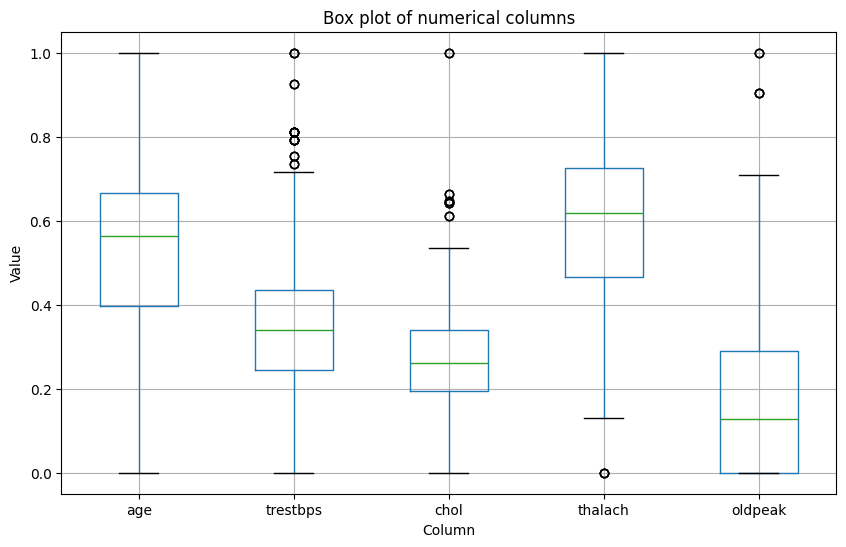

In [20]:
# Visualize the outliers with box plot
import matplotlib.pyplot as plt

# Select the numerical columns to plot
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create a box plot for each numerical column
plt.figure(figsize=(10, 6))
df[numerical_cols].boxplot()
plt.title("Box plot of numerical columns")
plt.ylabel("Value")
plt.xlabel("Column")
plt.show()

In [28]:
# Detect and remove outliers using IQR for 'trestbps' (resting blood pressure)
Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



**Create Target Variable**

In [29]:
# Assume 'target' is the column indicating heart disease presence
X = df.drop('target', axis=1)  # Features
y = df['target']              # Target


**Validate the Dataset**

In [30]:
# Verify the changes using head and info
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info:")
df.info()

# Check for balanced classes in the target variable
print("\nClass distribution in the target variable:")
print(df['target'].value_counts())


First 5 rows of the DataFrame:
        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.479167    1  -1  0.292453  0.196347    0        1  0.740458      0   
1  0.500000    1  -1  0.433962  0.175799    1        0  0.641221      1   
2  0.854167    1  -1  0.481132  0.109589    0        1  0.412214      1   
3  0.666667    1  -1  0.509434  0.175799    0        1  0.687023      0   
4  0.687500    0  -1  0.415094  0.383562    1        1  0.267176      0   

    oldpeak  slope  ca  target  thal_1  thal_2  thal_3  
0  0.161290      2   2       0   False   False    True  
1  0.500000      0   0       0   False   False    True  
2  0.419355      0   0       0   False   False    True  
3  0.000000      2   1       0   False   False    True  
4  0.306452      1   3       0   False    True   False  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------  

**Save the Preprocessed Dataset**

In [31]:
# Save the preprocessed dataset
df.to_csv("preprocessed_heart_disease_dataset.csv", index=False)


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
X = df.drop(columns='target')  # Assuming 'target' is the column for heart disease prediction
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

